## Problem Statement:

### Find out the factors affecting a student to enroll in a program. This will help our sales team to effectively determin who we can successfully enroll under our organization.

In [1]:
#import Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.stats.outliers_influence as sm2
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=[10,8])


<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

# 1.  Import and Understand Data

In [2]:
df=pd.read_csv("Leads.csv")
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.shape

(9240, 37)

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#check for duplicates
sum(df.duplicated(subset = 'Prospect ID')) == 0

True

In [7]:
#check for duplicates
df['Lead Number']=df['Lead Number'].astype(object)
sum(df.duplicated(subset = 'Lead Number')) == 0

True

In [8]:
# Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.
#dropping Lead Number and Prospect ID since they have all unique values

df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

# 2. Exploratory Data Analysis

### Data Cleaning and Treatment

In [9]:
# As we can observe that there are select values for many column.
#This is because customer did not select any option from the list, hence it shows select.
# Select values are as good as NULL.

# Converting 'Select' values to NaN.
df = df.replace('Select', np.nan)

In [10]:
#lets check for missing values
round((df.isnull().sum()/len(df))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [11]:
# Lets drop the columns having >70% null values
df = df.drop(df.loc[:,list(round(100*(df.isnull().sum()/len(df.index)), 2)>70)].columns, 1)

In [12]:
#lets check for missing values
round((df.isnull().sum()/len(df))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Lead Quality

In [13]:
df['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

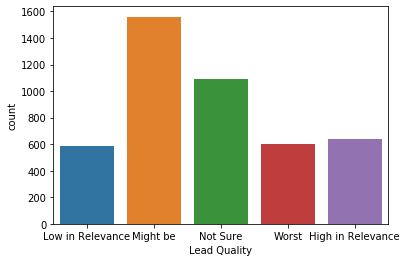

In [14]:
sns.countplot(df['Lead Quality'])

In [15]:
# As Lead quality is based on the intution of employee, so if left blank we can impute 'Not Sure' in NaN safely.
df['Lead Quality'] = df['Lead Quality'].replace(np.nan, 'Not Sure')

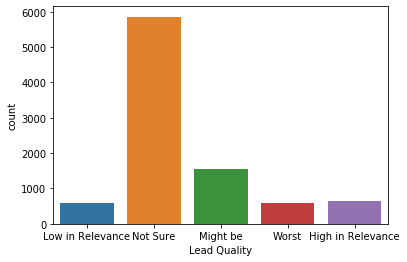

In [16]:
sns.countplot(df['Lead Quality'])

## Asymmetrique Activity Index Asymmetrique Profile Index Asymmetrique Activity Score Asymmetrique Profile Score

In [17]:
# Asymmetrique Activity Index  |
# Asymmetrique Profile Index   \   An index and score assigned to each customer
# Asymmetrique Activity Score  |    based on their activity and their profile
# Asymmetrique Profile Score   \

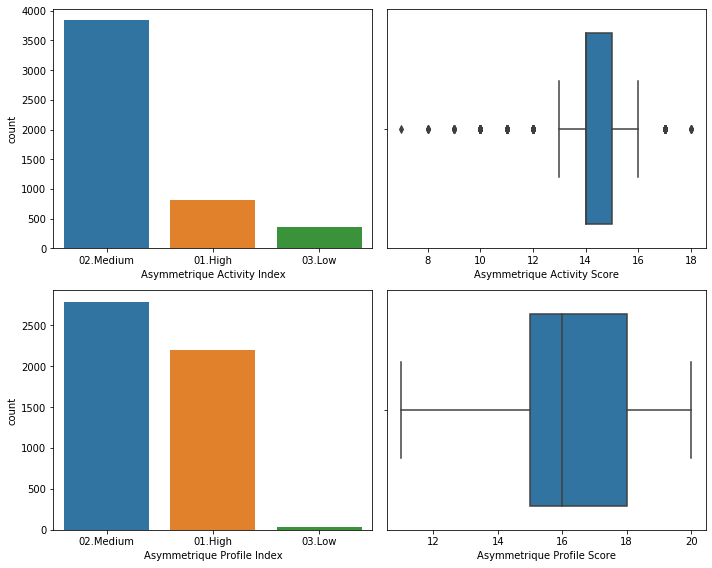

In [18]:
fig, axs = plt.subplots(2,2, figsize = (10,8))
plt1 = sns.countplot(df['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(df['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(df['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(df['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

#### There is too much variation in thes parameters so its not reliable to impute any value in it. 
#### 45% null values means we need to drop these columns.

In [19]:
df = df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

## City

In [20]:
df.City.value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

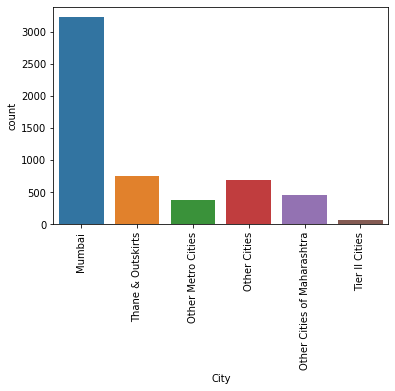

In [21]:
sns.countplot(df.City)
plt.xticks(rotation = 90)
plt.show()

In [22]:
df['City'] = df['City'].replace(np.nan, 'Mumbai')

## Specialization

In [23]:
df.Specialization.value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

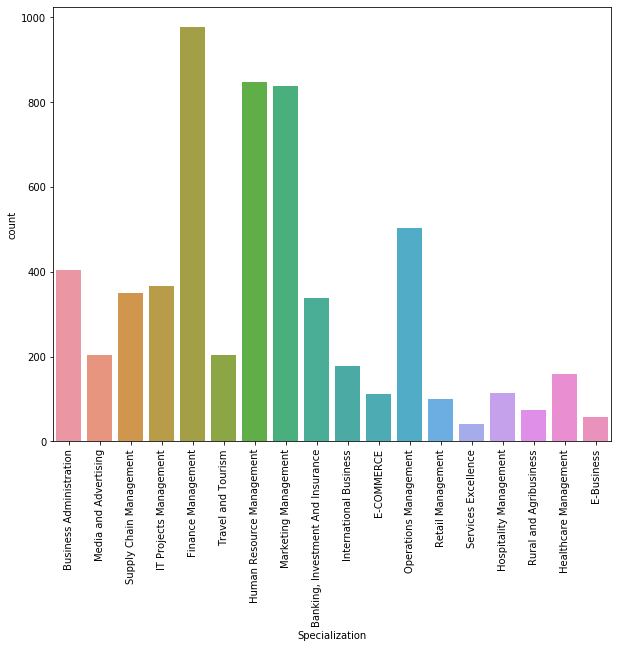

In [24]:
plt.figure(figsize=[10,8])
sns.countplot(df.Specialization)
plt.xticks(rotation = 90)
plt.show()

#### It maybe the case that lead has not entered any specialization if his/her option is not availabe on the list,
####  May not have any specialization or is a student.
#### Hence we can make a category "Others" for missing values.

In [25]:
df['Specialization'] = df['Specialization'].replace(np.nan, 'Other_Specialization')

In [26]:
#lets check for missing values
round((df.isnull().sum()/len(df))*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                    0.00
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

## Tags

In [27]:
df.Tags.value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

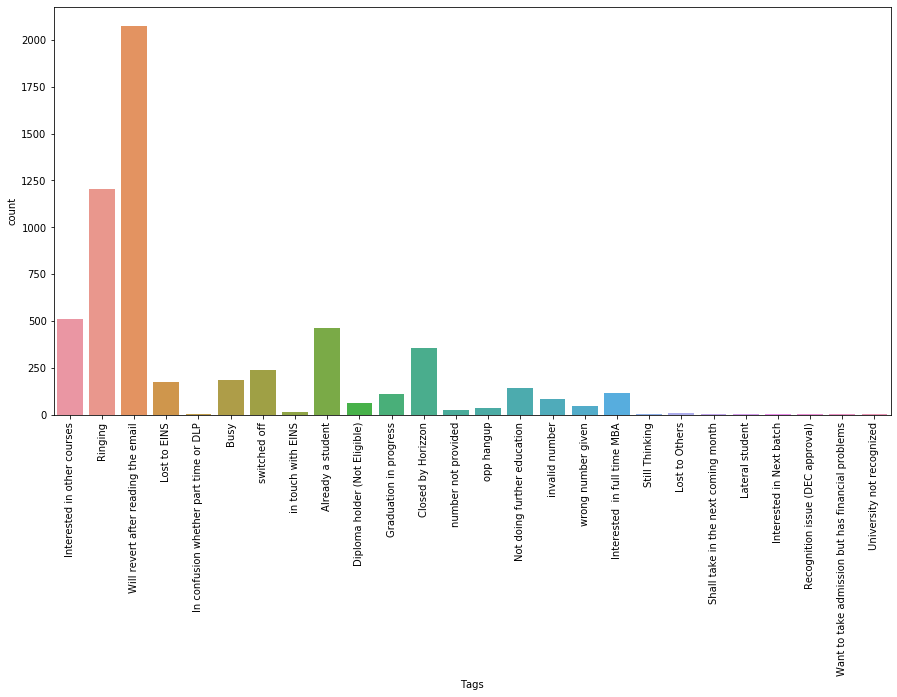

In [28]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(df.Tags)
plt.xticks(rotation = 90)
plt.show()

In [29]:
df['Tags'] = df['Tags'].replace(np.nan, 'Will revert after reading the email')

## What matters most to you in choosing a course

In [30]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [31]:
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

## What is your current occupation

In [32]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [33]:
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

## Country

In [34]:
df['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
South Africa               4
Kuwait                     4
Germany                    4
Sweden                     3
Belgium                    2
Asia/Pacific Region        2
Bangladesh                 2
Philippines                2
Italy                      2
Ghana                      2
China                      2
Uganda                     2
Netherlands                2
Vietnam                    1
Indonesia                  1
Liberia                    1
Sri Lanka                  1
Tanzania                   1
Malaysia      

In [35]:
# Country is India for most values so let's impute the same in missing values.
df['Country'] = df['Country'].replace(np.nan, 'India')

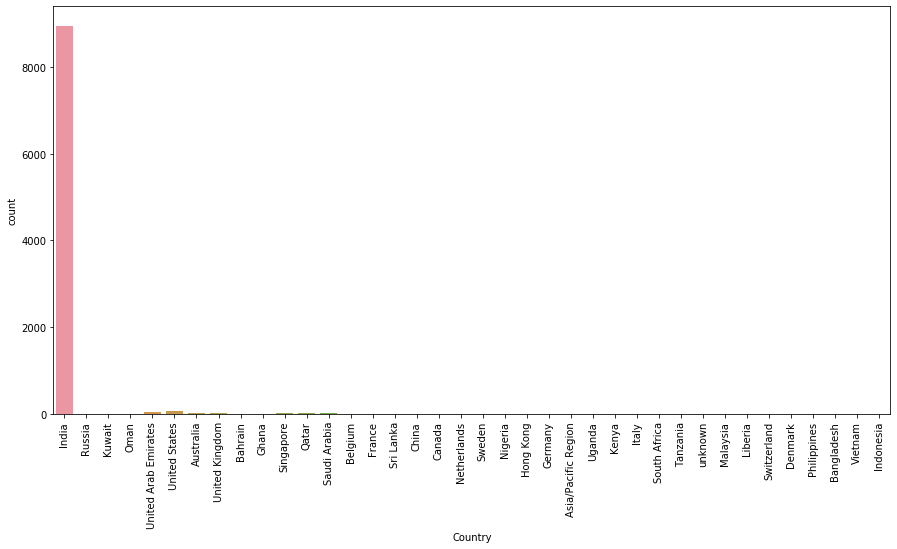

In [36]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(df.Country)
plt.xticks(rotation = 90)
plt.show()

In [37]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [38]:
# Rest missing values are under 2% so we can drop these rows.
df.dropna(inplace = True)

In [39]:
round(100*(df.isnull().sum()/len(df.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [40]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

## Data Visualization

## Lead Origin

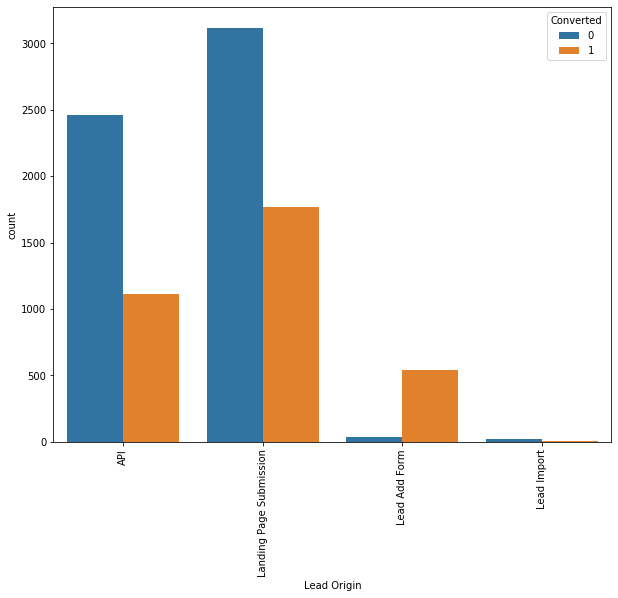

In [41]:
plt.figure(figsize=[10,8])
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

### Inference 
#### API and Landing Page Submission have 30-35% conversion rate but count of lead originated from them are considerable.
#### Lead Add Form has more than 90% conversion rate but count of lead are not very high.
#### Lead Import are very less in count.
#### To improve overall lead conversion rate, we need to focus more on improving lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

## Lead Source

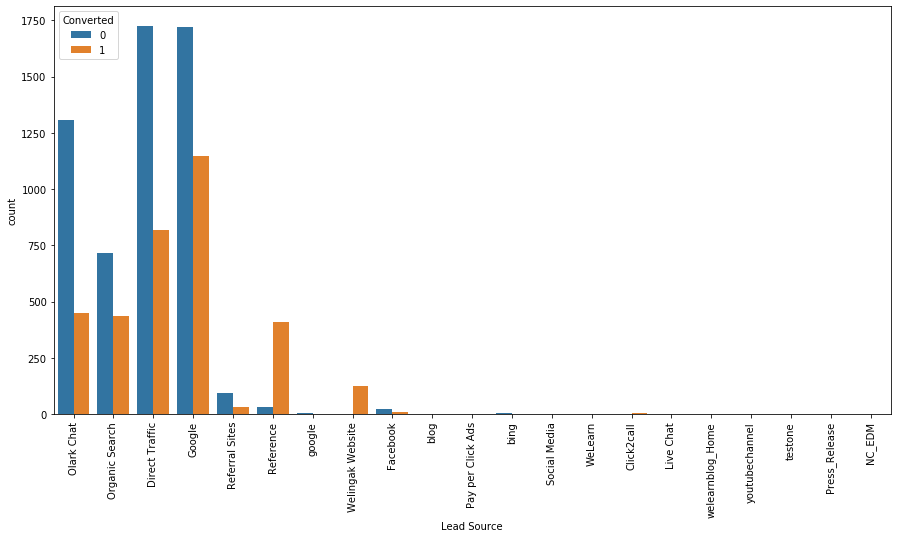

In [42]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [43]:
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others_Lead Sources')

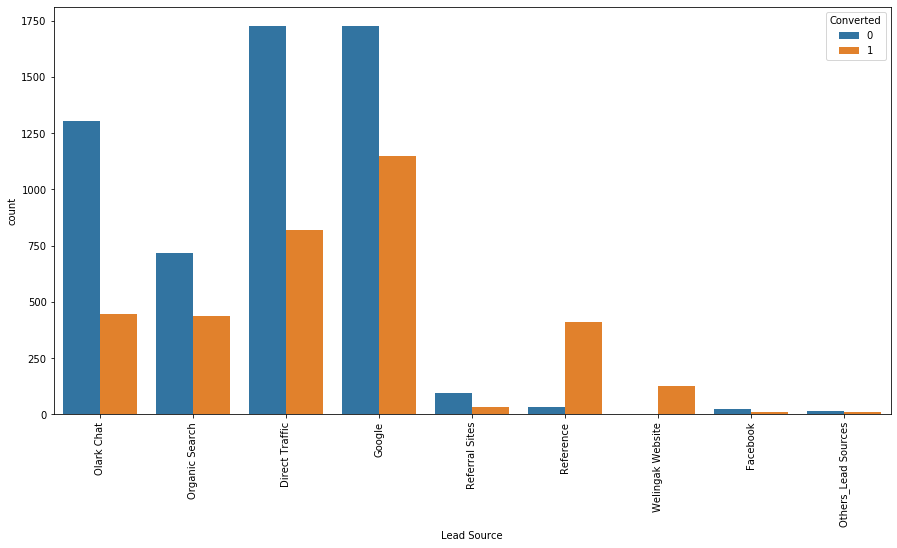

In [44]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference 
#### Google and Direct traffic generates maximum number of leads.
#### Conversion Rate of reference leads and leads through welingak website is high.
#### To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

## Do Not Email & Do Not Call

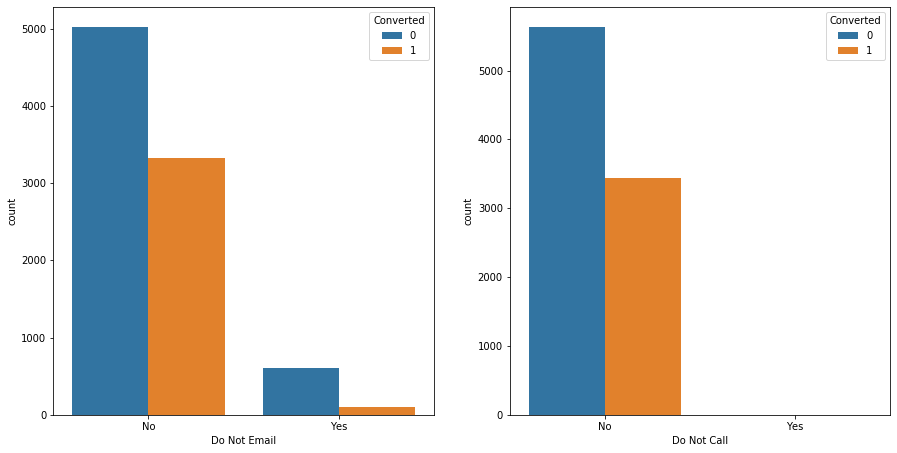

In [45]:
fig, axs = plt.subplots(1,2,figsize = (15,7.5))
sns.countplot(x = "Do Not Email", hue = "Converted", data = df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = df, ax = axs[1])

## TotalVisits

In [46]:
df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

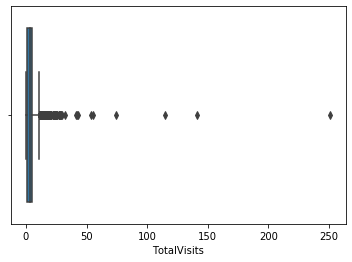

In [47]:
sns.boxplot(df['TotalVisits'])

In [48]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.
percentiles = df['TotalVisits'].quantile([0.05,0.95]).values
df['TotalVisits'][df['TotalVisits'] <= percentiles[0]] = percentiles[0]
df['TotalVisits'][df['TotalVisits'] >= percentiles[1]] = percentiles[1]

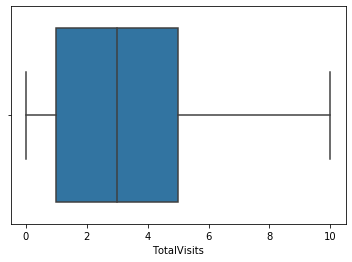

In [49]:
sns.boxplot(df['TotalVisits'])
plt.show()

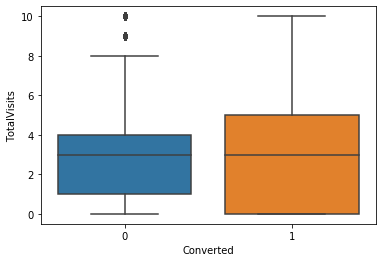

In [50]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

#### Inference 
#### Median for converted and not converted leads are the same.
#### Nothng conclusive can be said on the basis of Total Visits.

## Total Time Spent on Website

In [51]:
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

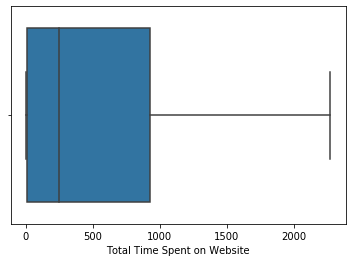

In [52]:
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

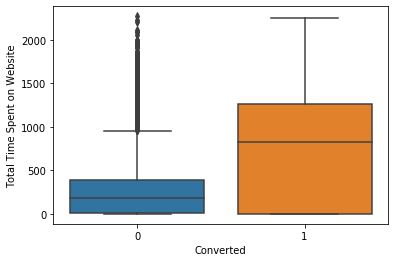

In [53]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = df)
plt.show()

#### Inference 
#### Leads spending more time on the weblise are more likely to be converted.
#### Website should be made more engaging to make leads spend more time.

## Page Views Per Visit

In [54]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

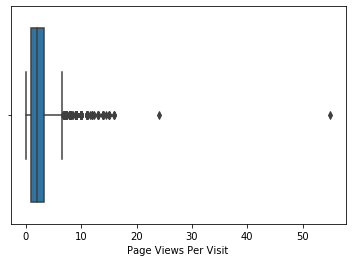

In [55]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [56]:
# As we can see there are a number of outliers in the data.
# We will cap the outliers to 95% value for analysis.
percentiles = df['Page Views Per Visit'].quantile([0.05,0.95]).values
df['Page Views Per Visit'][df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
df['Page Views Per Visit'][df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

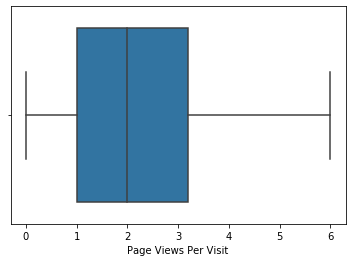

In [57]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

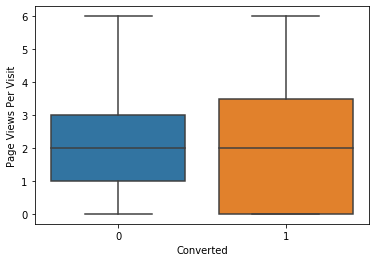

In [58]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)
plt.show()

#### Inference 
#### Median for converted and unconverted leads is the same.
#### Nothing can be said specifically for lead conversion from Page Views Per Visit

## Last Activity

In [59]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

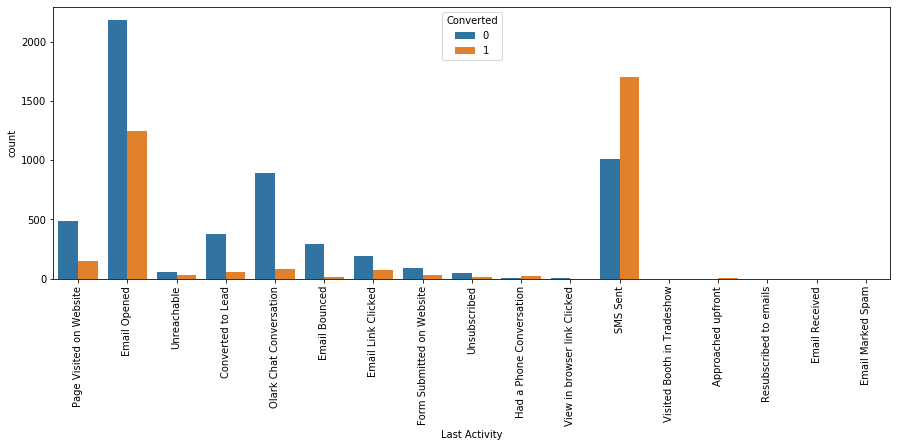

In [60]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [61]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
df['Last Activity'] = df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

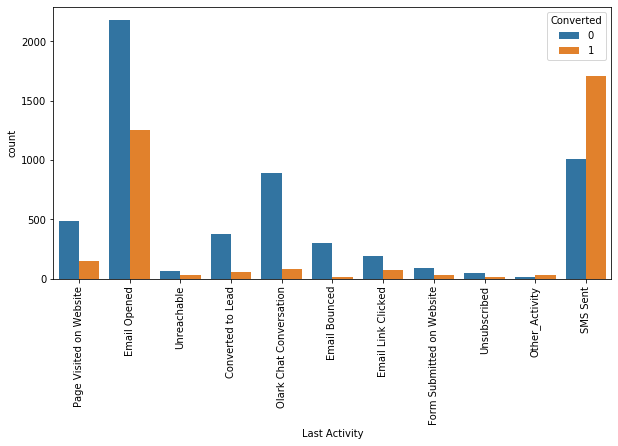

In [62]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most of the lead have their Email opened as their last activity.
#### Conversion rate for leads with last activity as SMS Sent is almost 60%.

## Country

In [63]:
df.Country.value_counts(dropna=False)

India                   8787
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
Canada                     4
South Africa               4
Kuwait                     4
Germany                    4
Sweden                     3
Italy                      2
Belgium                    2
Asia/Pacific Region        2
Philippines                2
Ghana                      2
China                      2
Netherlands                2
Uganda                     2
Bangladesh                 2
Vietnam                    1
Indonesia                  1
Russia                     1
Switzerland                1
Sri Lanka                  1
Tanzania                   1
Malaysia      

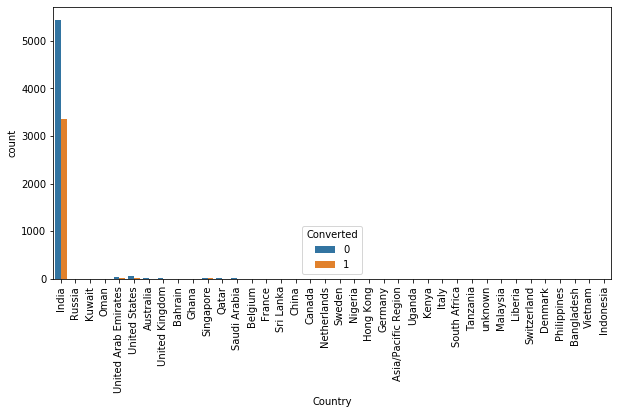

In [64]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Country", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most values are 'India' no such inference can be drawn

## Specialization

In [65]:
df.Specialization.value_counts(dropna=False)

Other_Specialization                 3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Travel and Tourism                    202
Media and Advertising                 202
International Business                176
Healthcare Management                 156
E-COMMERCE                            111
Hospitality Management                111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [66]:
df['Specialization'] = df['Specialization'].replace(['Others'], 'Other_Specialization')

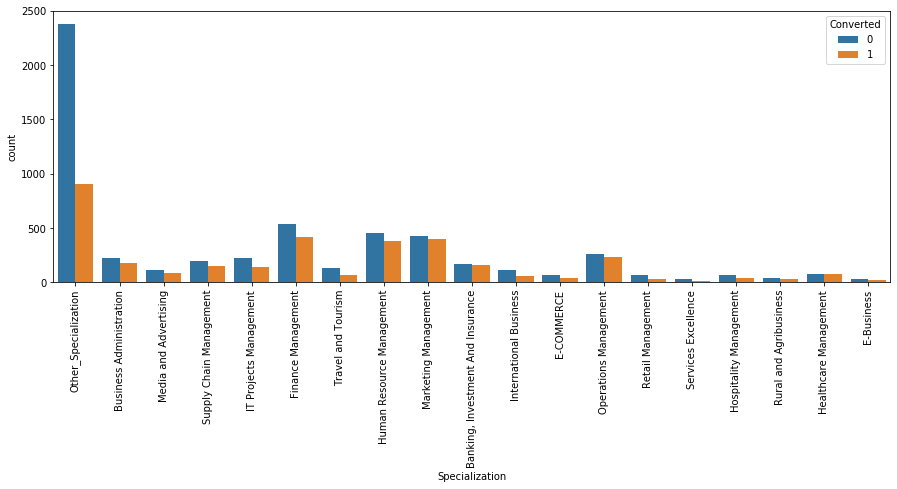

In [67]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Focus should be more on the Specialization with high conversion rate.

## What is your current Occupation

In [68]:
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8159
Working Professional     677
Student                  206
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [69]:
df['What is your current occupation'] = df['What is your current occupation'].replace(['Other'], 'Other_Occupation')

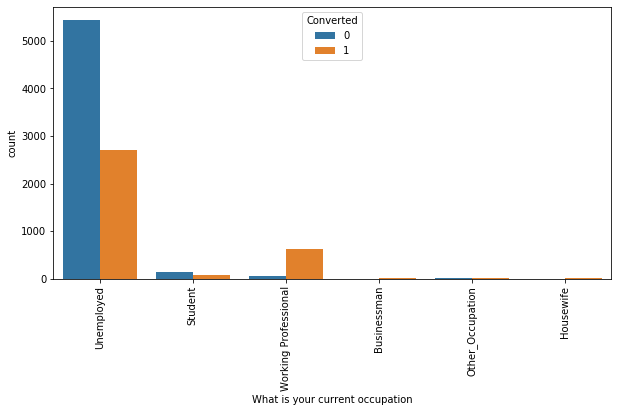

In [70]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Working Professionals going for the course have high chances of joining it.
#### Unemployed leads are the most in numbers but has around 30-35% conversion rate.

## What matters most to you in choosing a course

In [71]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9072
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

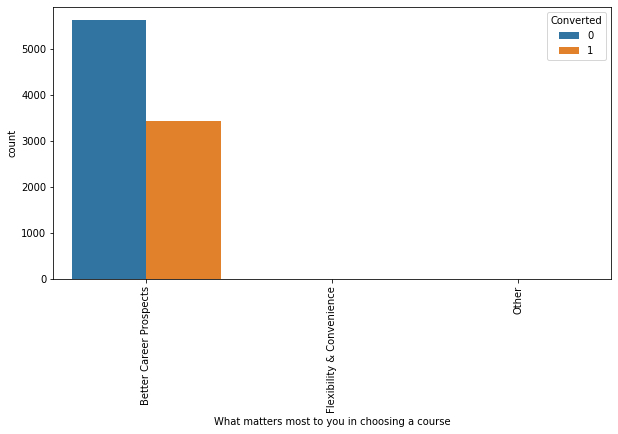

In [72]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
##### Most entries are 'Better Career Prospects'. No Inference can be drawn with this parameter.

## Search

In [73]:
df.Search.value_counts(dropna=False)

No     9060
Yes      14
Name: Search, dtype: int64

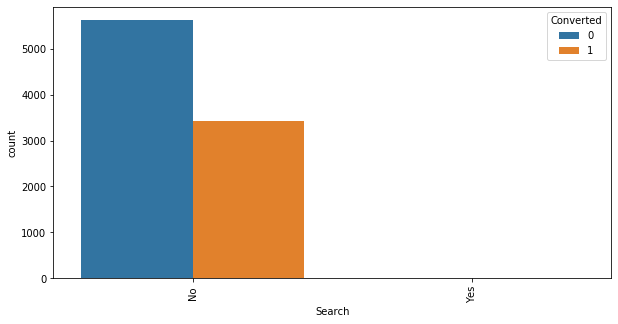

In [74]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Search", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Magazine

In [75]:
df.Magazine.value_counts(dropna=False)

No    9074
Name: Magazine, dtype: int64

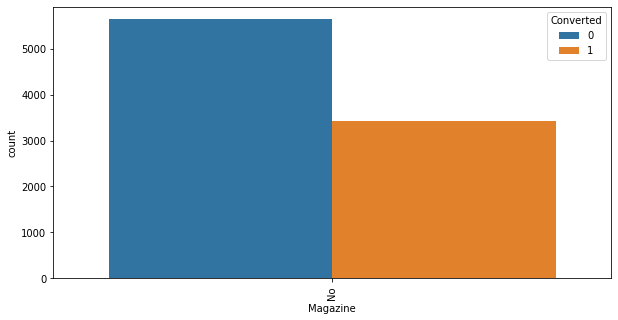

In [76]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Magazine", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Newspaper Article

In [77]:
df['Newspaper Article'].value_counts(dropna=False)

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

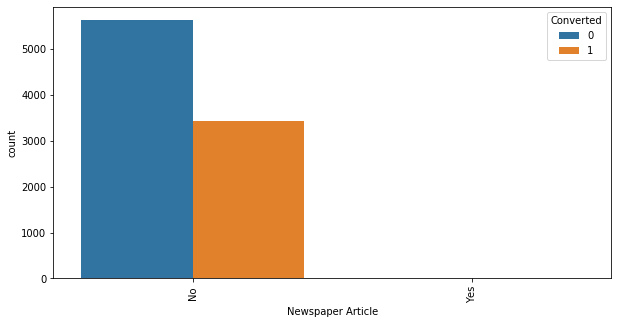

In [78]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Newspaper Article", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Education Forums

In [79]:
df['X Education Forums'].value_counts(dropna=False)

No     9073
Yes       1
Name: X Education Forums, dtype: int64

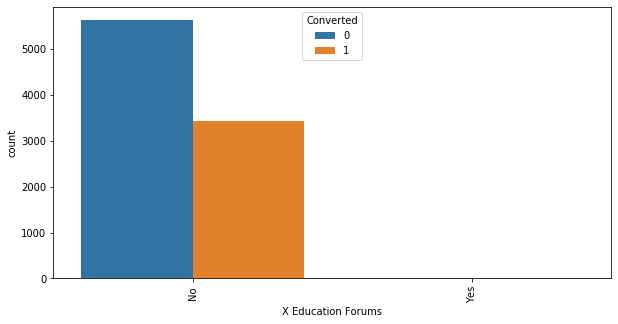

In [80]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "X Education Forums", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Newspaper

In [81]:
df['Newspaper'].value_counts(dropna=False)

No     9073
Yes       1
Name: Newspaper, dtype: int64

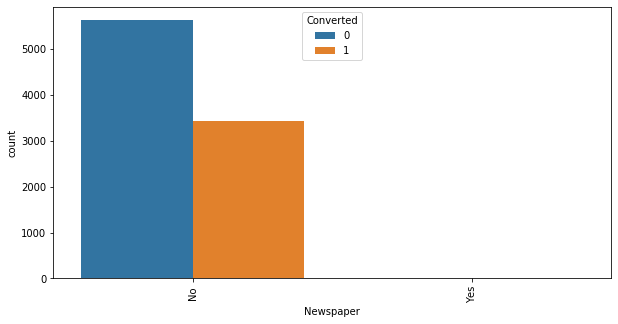

In [82]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Newspaper", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Digital Advertisement

In [83]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

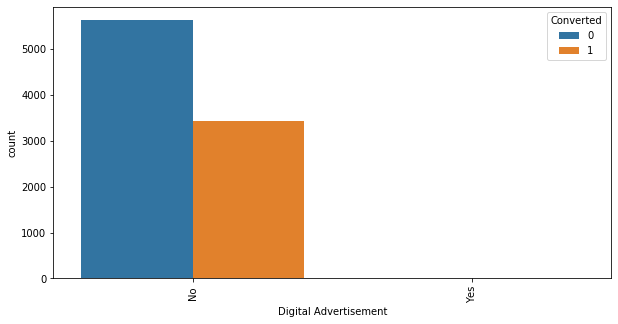

In [84]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Through Recommendations

In [85]:
df['Through Recommendations'].value_counts(dropna=False)

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

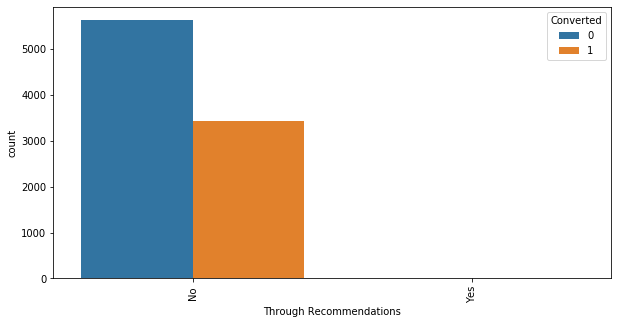

In [86]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Through Recommendations", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Receive More Updates About Our Courses

In [87]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

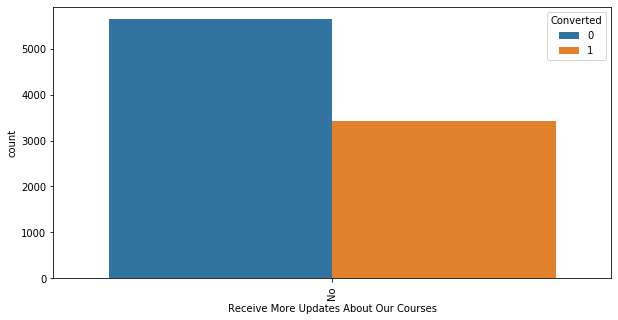

In [88]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Tags

In [89]:
df.Tags.value_counts(dropna=False)

Will revert after reading the email                  5343
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with EINS                                     12
Lost to Others

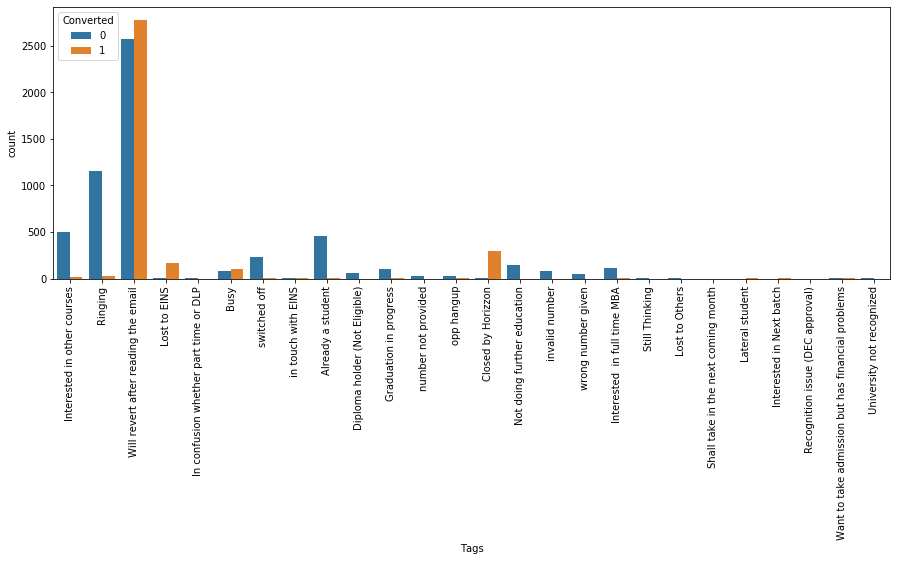

In [90]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [91]:
# Let's keep considerable last activities as such and club all others to "Other_Activity"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

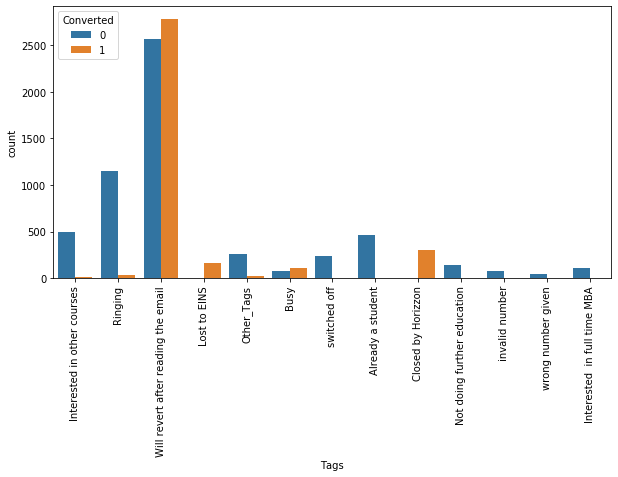

In [92]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Tags", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Will Revert to Email tagged Leads have a good Conversion rate out of maximum no: of leads
#### Lost to EINS, Closed by Horizzon have higher conversion rate

## Lead Quality

In [93]:
df['Lead Quality'].value_counts(dropna=False)

Not Sure             5806
Might be             1519
Worst                 601
High in Relevance     592
Low in Relevance      556
Name: Lead Quality, dtype: int64

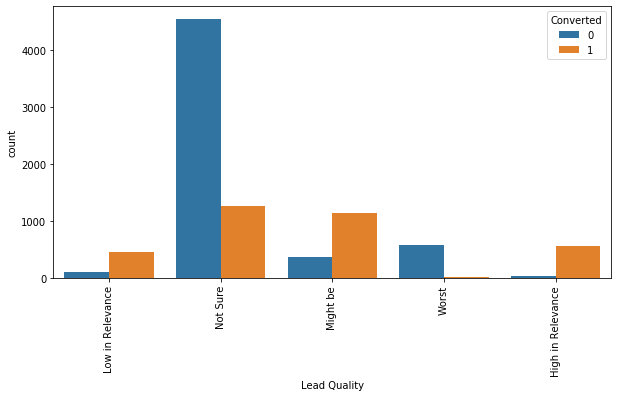

In [94]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Low in Relevance Might Be and High in Relevance have higher conversion rate
#### Need to work on Not Sure Leads

## Update me on Supply Chain Content

In [95]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9074
Name: Update me on Supply Chain Content, dtype: int64

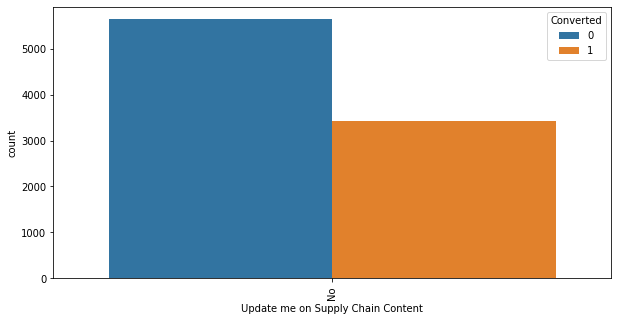

In [96]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## Get updates on DM Content

In [97]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    9074
Name: Get updates on DM Content, dtype: int64

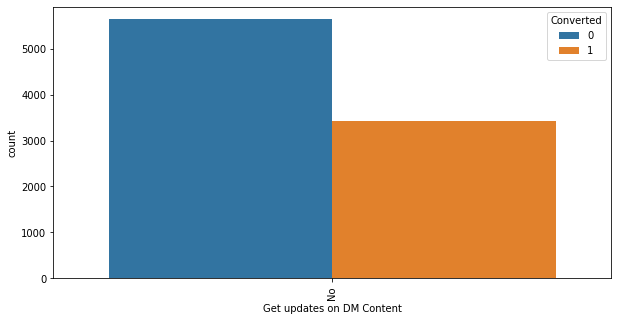

In [98]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## I agree to pay the amount through cheque

In [99]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

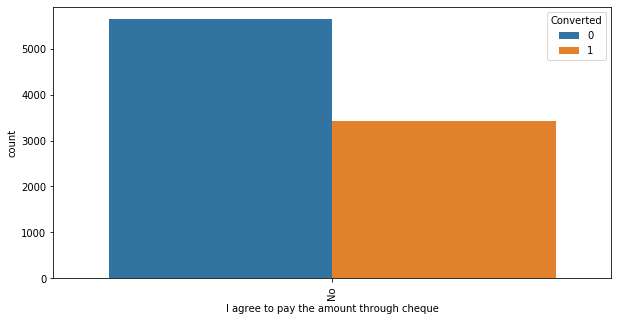

In [100]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## A free copy of Mastering The Interview

In [101]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

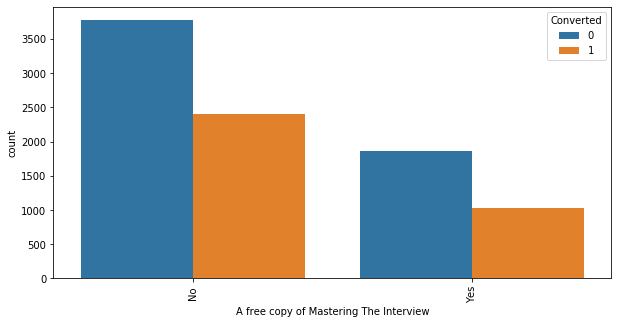

In [102]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most entries are 'No'. No Inference can be drawn with this parameter.

## City

In [103]:
df.City.value_counts(dropna=False)

Mumbai                         6752
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

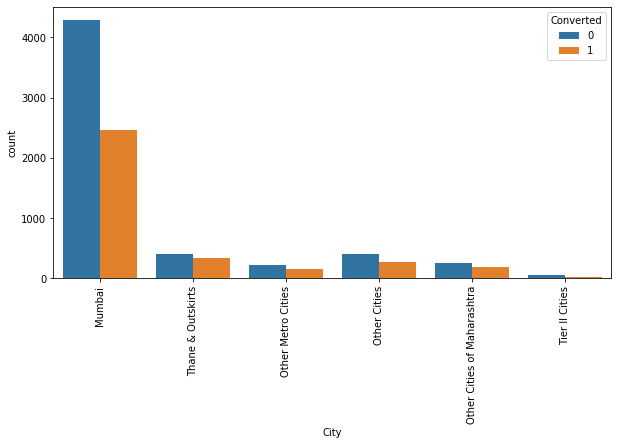

In [104]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

#### Inference
#### Most leads are from mumbai with around 30% conversion rate.

## Last Noteable Activity

In [105]:
df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

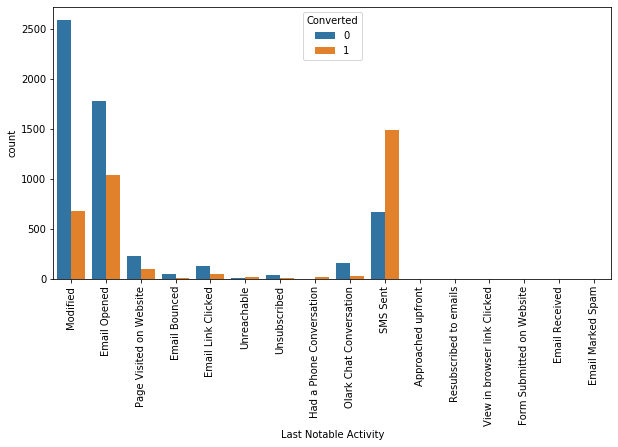

In [106]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

### Results
### Based on the above analysis we have seen that many columns are not adding any information to the model, heance we can drop them for frther analysis

In [107]:
col=['What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country']
col

['What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

In [108]:
df=df.drop(col,axis=1)
df

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,1,8.0,1845,2.67,Other_Activity,IT Projects Management,Unemployed,Will revert after reading the email,High in Relevance,Mumbai,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,0,2.0,238,2.00,SMS Sent,Media and Advertising,Unemployed,wrong number given,Might be,Mumbai,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,0,2.0,199,2.00,SMS Sent,Business Administration,Unemployed,invalid number,Not Sure,Mumbai,SMS Sent
9238,Landing Page Submission,Google,No,No,1,3.0,499,3.00,SMS Sent,Human Resource Management,Unemployed,Will revert after reading the email,Not Sure,Other Metro Cities,SMS Sent


In [109]:
# Univariate analysis can be seen above, But we are yet to confirm the conversion rate here
round((sum(df["Converted"])/len(df))*100,2)

37.86

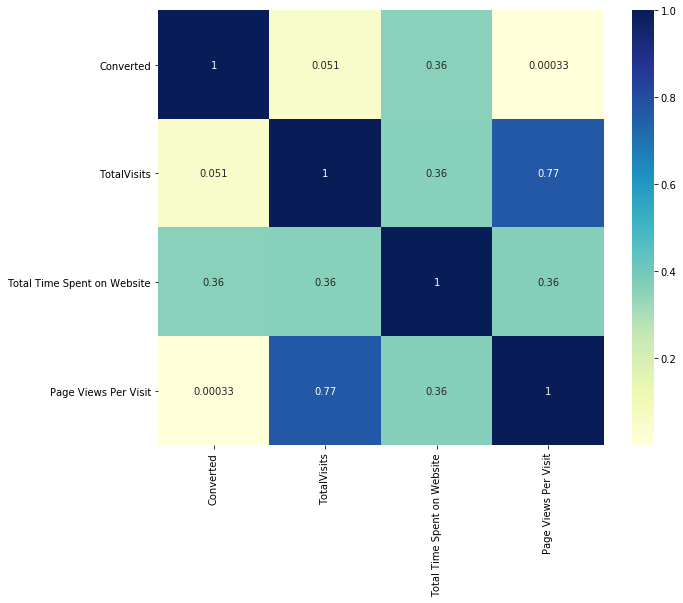

In [110]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [111]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity'],
      dtype='object')

In [112]:
df.head(10)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified
5,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Other_Specialization,Unemployed,Will revert after reading the email,Not Sure,Mumbai,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,Low in Relevance,Mumbai,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,Other_Specialization,Unemployed,Will revert after reading the email,Not Sure,Mumbai,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.0,Email Opened,IT Projects Management,Unemployed,Will revert after reading the email,Not Sure,Thane & Outskirts,Email Opened
9,API,Google,No,No,0,4.0,58,4.0,Email Opened,Finance Management,Unemployed,Will revert after reading the email,Not Sure,Mumbai,Email Opened


In [113]:
df.shape

(9074, 15)

# 4. Data Preparation

In [114]:
#getting a list of categorical columns

cat_cols= df.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'Tags', 'Lead Quality', 'City', 'Last Notable Activity'],
      dtype='object')

In [115]:
# List of variables to map

varlist =  ['Do Not Call','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [116]:
# Lets Create Dummy Variables for Categorical variables
cols = df.columns
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Tags', 'Lead Quality', 'City',
       'Last Notable Activity'],
      dtype='object')

In [117]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others_Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [118]:
#dropping the original columns after dummy variable creation

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Other_Specialization,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Other_Specialization,...,0,0,1,0,0,0,0,0,0,0


In [119]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [120]:
# Splitting the X and Y variables
X=df.drop(['Converted'],axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [121]:
y=df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [122]:
# Splitting into Test and Train Data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [123]:
# Standardizing the Numeric data
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler=StandardScaler()
X_train[num_cols]=scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [124]:
# Checking the Churn Rate
Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

37.85541106458012

# 5. Model Building

In [125]:
#lets build our first model
# Logistic regression model
lr = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.0
Date:                Sun, 06 Sep 2020   Deviance:                       2500.0
Time:                        18:10:50   Pearson chi2:                 3.87e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.1434   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.3882      0.327     -4.243      0.000      -2.030      -0.747
Do Not Call                                             23.7150   1.37e+05      0.000      1.000   -2.68e+05    2.68e+05
TotalVisits                                              0.1816      0.087      2.093      0.036       0.012       0.352
Total Time Spent on Website                              1.1457      0.064     17.913      0.000       1.020       1.271
Page Views Per Visit                                    -0.3272      0.099     -3.309      0.001      -0.521      -0.133
Lead Origin_Landing Page Submission                     -0.9762      0.221     -4.420      0.000      -1.409      -0.543
Lead Origin_Lead Add Form                               -0.4165      1.287     -0.324      0.746      -2.940       2.107
Lead Origin_Lead Import                                 29.7289   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.6304   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2017      0.155      1.302      0.193      -0.102       0.505
Lead Source_Olark Chat                                   0.8633      0.234      3.693      0.000       0.405       1.321
Lead Source_Organic Search                               0.2278      0.210      1.083      0.279      -0.185       0.640
Lead Source_Others_Lead Sources                          0.7602      0.816      0.931      0.352      -0.839       2.360
Lead Source_Reference                                    1.7732      1.344      1.319      0.187      -0.861       4.407
Lead Source_Referral Sites                              -0.0945      0.491     -0.193      0.847      -1.056       0.867
Lead Source_Welingak Website                             5.4722      1.486      3.682      0.000       2.559       8.385
Last Activity_Email Bounced                             -0.5488      0.870     -0.631      0.528      -2.254       1.157
Last Activity_Email Link Clicked                         0.8429      0.644      1.309      0.190      -0.419       2.105
Last Activity_Email Opened                              -0.0003      0.384     -0.001      0.999      -0.754       0.753
Last Activity_Form Submitted on Website                  0.1337      0.593      0.225      0.822      -1.028       1.296
Last Activity_Olark Chat Conversation                   -0.5464      0.392     -1.395      0.163      -1.314       0.221
Last Activity_Other_Activity                             1

In [126]:
#Feature Selection using RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [127]:
# lets see the columns that can be reduced here
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 33),
 ('TotalVisits', False, 39),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 38),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 44),
 ('Lead Source_Google', False, 41),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 42),
 ('Lead Source_Others_Lead Sources', False, 47),
 ('Lead Source_Reference', False, 68),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 29),
 ('Last Activity_Email Link Clicked', False, 35),
 ('Last Activity_Email Opened', False, 66),
 ('Last Activity_Form Submitted on Website', False, 67),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Other_Activity', False, 9),
 ('Last Activity_Page Visited on Website', False, 36),
 ('Last Activi

In [128]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [129]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others_Lead Sources', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Manageme

In [130]:
X_train_sm = sm.add_constant(X_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.1
Date:                Sun, 06 Sep 2020   Deviance:                       3160.2
Time:                        18:11:02   Pearson chi2:                 3.11e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.7920      0.278     -2.845      0.004      -1.338      -0.246
Do Not Email                                  -1.3202      0.212     -6.236      0.000      -1.735      -0.905
Lead Origin_Lead Add Form                      1.0521      0.363      2.897      0.004       0.340       1.764
Lead Source_Welingak Website                   3.4638      0.819      4.231      0.000       1.859       5.068
What is your current occupation_Unemployed    -1.1148      0.237     -4.713      0.000      -1.578      -0.651
Tags_Busy                                      3.5772      0.333     10.752      0.000       2.925       4.229
Tags_Closed by Horizzon                        7.7760      0.762     10.203      0.000       6.282       9.270
Tags_Lost to EINS                              8.9986      0.754     11.931      0.000       7.520      10.477
Tags_Ringing                                  -1.9203      0.340     -5.640      0.000      -2.588      -1.253
Tags_Will revert after reading the email       3.7576      0.229     16.412      0.000       3.309       4.206
Tags_invalid number                          -23.4125   2.21e+04     -0.001      0.999   -4.34e+04    4.34e+04
Tags_switched off                             -2.5224      0.589     -4.279      0.000      -3.678      -1.367
Tags_wrong number given                      -23.0270   3.17e+04     -0.001      0.999   -6.21e+04     6.2e+04
Lead Quality_Not Sure                         -3.3269      0.129    -25.702      0.000      -3.581      -3.073
Lead Quality_Worst                            -3.9922      0.832     -4.798      0.000      -5.623      -2.361
Last Notable Activity_SMS Sent                 2.7952      0.122     22.846      0.000       2.555       3.035
==============================================================================================================
"""

In [131]:
#Lets check the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [sm2.variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,7.37
12,Lead Quality_Not Sure,4.05
8,Tags_Will revert after reading the email,4.02
7,Tags_Ringing,1.86
1,Lead Origin_Lead Add Form,1.58
14,Last Notable Activity_SMS Sent,1.54
13,Lead Quality_Worst,1.35
2,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.25
10,Tags_switched off,1.17


In [132]:
# WE can see that Pvalue is high for column Lead Source_Referral Sites. Hence we can drop the column
col=col.drop('Tags_invalid number')
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [133]:
# Rebuilding Model with New columns
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1585.9
Date:                Sun, 06 Sep 2020   Deviance:                       3171.8
Time:                        18:11:03   Pearson chi2:                 3.07e+04
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9144      0.282     -3.245      0.001      -1.467      -0.362
Do Not Email                                  -1.3129      0.211     -6.218      0.000      -1.727      -0.899
Lead Origin_Lead Add Form                      1.0839      0.365      2.969      0.003       0.368       1.800
Lead Source_Welingak Website                   3.4275      0.819      4.184      0.000       1.822       5.033
What is your current occupation_Unemployed    -1.1577      0.239     -4.848      0.000      -1.626      -0.690
Tags_Busy                                      3.7579      0.331     11.338      0.000       3.108       4.407
Tags_Closed by Horizzon                        7.9271      0.763     10.394      0.000       6.432       9.422
Tags_Lost to EINS                              9.1535      0.755     12.128      0.000       7.674      10.633
Tags_Ringing                                  -1.7229      0.339     -5.089      0.000      -2.386      -1.059
Tags_Will revert after reading the email       3.9200      0.230     17.026      0.000       3.469       4.371
Tags_switched off                             -2.3187      0.588     -3.942      0.000      -3.471      -1.166
Tags_wrong number given                      -20.8331   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                         -3.3174      0.129    -25.685      0.000      -3.571      -3.064
Lead Quality_Worst                            -3.9830      0.834     -4.777      0.000      -5.617      -2.349
Last Notable Activity_SMS Sent                 2.7537      0.121     22.849      0.000       2.518       2.990
==============================================================================================================
"""

In [134]:
#Lets check the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [sm2.variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,7.26
11,Lead Quality_Not Sure,4.04
8,Tags_Will revert after reading the email,3.88
7,Tags_Ringing,1.82
1,Lead Origin_Lead Add Form,1.58
13,Last Notable Activity_SMS Sent,1.53
12,Lead Quality_Worst,1.35
2,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.25
9,Tags_switched off,1.16


In [135]:
# Here again we can see the column 'Last Notable Activity_SMS Sent' has High VIF value, Hence we can delete the column
col=col.drop('Tags_wrong number given')
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Not Sure', 'Lead Quality_Worst',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [136]:
# Rebuilding Model with New columns
X_train_sm = sm.add_constant(X_train[col])
lr2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lr2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1587.9
Date:                Sun, 06 Sep 2020   Deviance:                       3175.8
Time:                        18:11:03   Pearson chi2:                 3.08e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9661      0.283     -3.417      0.001      -1.520      -0.412
Do Not Email                                  -1.3127      0.211     -6.223      0.000      -1.726      -0.899
Lead Origin_Lead Add Form                      1.0963      0.366      2.995      0.003       0.379       1.814
Lead Source_Welingak Website                   3.4147      0.820      4.166      0.000       1.808       5.021
What is your current occupation_Unemployed    -1.1746      0.240     -4.899      0.000      -1.644      -0.705
Tags_Busy                                      3.8305      0.330     11.598      0.000       3.183       4.478
Tags_Closed by Horizzon                        7.9914      0.763     10.480      0.000       6.497       9.486
Tags_Lost to EINS                              9.2178      0.755     12.217      0.000       7.739      10.697
Tags_Ringing                                  -1.6472      0.337     -4.885      0.000      -2.308      -0.986
Tags_Will revert after reading the email       3.9881      0.229     17.380      0.000       3.538       4.438
Tags_switched off                             -2.2412      0.587     -3.816      0.000      -3.392      -1.090
Lead Quality_Not Sure                         -3.3158      0.129    -25.690      0.000      -3.569      -3.063
Lead Quality_Worst                            -3.9600      0.836     -4.734      0.000      -5.599      -2.321
Last Notable Activity_SMS Sent                 2.7443      0.120     22.856      0.000       2.509       2.980
==============================================================================================================
"""

In [137]:
#Lets check the VIF
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [sm2.variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,What is your current occupation_Unemployed,7.18
10,Lead Quality_Not Sure,4.04
8,Tags_Will revert after reading the email,3.81
7,Tags_Ringing,1.80
1,Lead Origin_Lead Add Form,1.58
12,Last Notable Activity_SMS Sent,1.52
11,Lead Quality_Worst,1.35
2,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.25
9,Tags_switched off,1.16


### Here we can see that all columns are significant from Pvalues and all VIF values are under 5. This Model seems to be a pretty good fit.


In [138]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.187192
1012    0.167079
9226    0.000821
4750    0.781753
7987    0.977276
1281    0.989966
2880    0.187192
4971    0.753675
7536    0.863827
1248    0.000821
dtype: float64

In [139]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.87191534e-01, 1.67078806e-01, 8.21369066e-04, 7.81753466e-01,
       9.77276034e-01, 9.89966304e-01, 1.87191534e-01, 7.53674840e-01,
       8.63826796e-01, 8.21369066e-04])

In [140]:
# getting the Converted Values and Probabilities in one table
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,0,0.187192,3009
1,0,0.167079,1012
2,0,0.000821,9226
3,1,0.781753,4750
4,1,0.977276,7987


In [141]:
# creating a new column with 1 if churn prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.187192,3009,0
1,0,0.167079,1012,0
2,0,0.000821,9226,0
3,1,0.781753,4750,1
4,1,0.977276,7987,1


In [142]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3756  149]
 [ 363 2083]]


In [143]:
# Predicted     not_churn    churn
# Actual
# not_churn        3270      365
# churn            579       708 

In [144]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9193827743662415


### Metrics beyond Accuracy

In [145]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
sensitivity

0.8515944399018807

In [147]:
# Let us calculate specificity
specificity=TN / float(TN+FP)
specificity

0.9618437900128041

In [148]:
# Calculate false postive rate - predicting churn when customer does not have churned
FPR=(FP/ float(TN+FP))
FPR

0.038156209987195905

In [149]:
# positive predictive value 
PPV=(TP / float(TP+FP))
PPV

0.9332437275985663

In [150]:
# Negative predictive value
NPV=(TN / float(TN+ FN))
NPV

0.9118718135469774

#### Lets Plot the ROC curve

In [151]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()


In [152]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

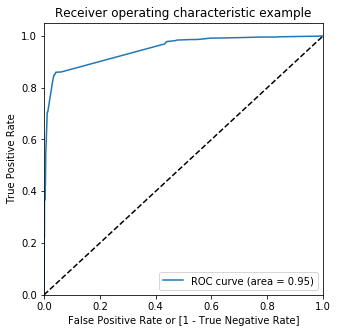

In [153]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### ROC Curve Looks Good, It is more alligned to the Left side of the Graph, Probably giving Higher Area Under Curve

#### Lets find the Optimal Cutoff point for the Probability of Conversion

In [154]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.187192,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.167079,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000821,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.781753,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977276,7987,1,1,1,1,1,1,1,1,1,1,1


In [155]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.705086  0.981603  0.531882
0.2   0.2  0.909148  0.860589  0.939565
0.3   0.3  0.920013  0.859771  0.957746
0.4   0.4  0.919855  0.858953  0.958003
0.5   0.5  0.919383  0.851594  0.961844
0.6   0.6  0.920170  0.851594  0.963124
0.7   0.7  0.919383  0.845462  0.965685
0.8   0.8  0.878917  0.706868  0.986684
0.9   0.9  0.818769  0.538839  0.994110


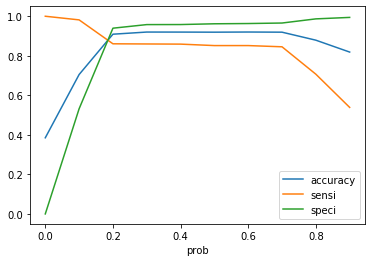

In [156]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the Curve we can see that at almost 0.2, we have the optimal cutoff point.

In [157]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.187192,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.167079,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000821,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.781753,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977276,7987,1,1,1,1,1,1,1,1,1,1,1,1


#### Assigning the Lead Score

In [158]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.187192,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.167079,1012,0,1,1,0,0,0,0,0,0,0,0,0,17
2,0,0.000821,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.781753,4750,1,1,1,1,1,1,1,1,1,0,0,1,78
4,1,0.977276,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [159]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

0.9091481656432058


#### There seems to be a drop in accuracy, not much of a drop than previous value 0.9104078097937333

In [160]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3669,  236],
       [ 341, 2105]], dtype=int64)

In [161]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [162]:
# Let's see the sensitivity of our logistic regression model
sensitivity_n=TP / float(TP+FN)
sensitivity_n

0.8605887162714636

In [163]:
# Let us calculate specificity
specificity_n=TN / float(TN+FP)
specificity_n

0.9395646606914213

In [164]:
# Calculate false postive rate - predicting churn when customer does not have churned
FPR_n=(FP/ float(TN+FP))
FPR_n

0.060435339308578744

In [165]:
# Positive predictive value 
PPV_n=(TP / float(TP+FP))
PPV_n

0.8991883810337462

In [166]:
# Negative predictive value
NPV_n=(TN / float(TN+ FN))
NPV_n

0.9149625935162095

### Precision and Recall 

In [167]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3756,  149],
       [ 363, 2083]], dtype=int64)

In [168]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [169]:
## Precision
precision=TP / (TP + FP)
precision

0.9332437275985663

In [170]:
## Recall
recall=TP/(TP+FN)
recall

0.8515944399018807

In [171]:
# using sklearn module to calculate the above

In [172]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.9332437275985663

In [173]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8515944399018807

In [174]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [175]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

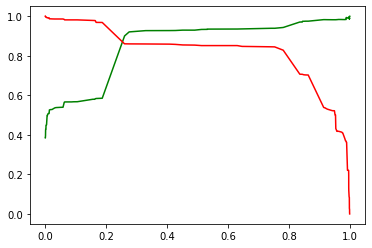

In [176]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Here we can see that the tradeoff is best when cutoff probability is 0.2

# 6. Making Predictions on Test Set

In [177]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [178]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,1,0,0,0,0,1,0,1,0,0
1490,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,1,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,1,0,0,0,0,1,0,1,0,0


In [179]:
X_test_sm = sm.add_constant(X_test)

In [180]:
y_test_pred = res.predict(X_test_sm)

In [181]:
y_test_pred.head()

3271    0.187192
1490    0.953558
7936    0.187192
4216    0.999703
3830    0.187192
dtype: float64

In [182]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [183]:
# Let's see the head
y_pred_1.head()

,0
3271,0.187192
1490,0.953558
7936,0.187192
4216,0.999703
3830,0.187192


In [184]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0


In [185]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
3271,0,3271
1490,1,1490
7936,0,7936
4216,1,4216
3830,0,3830


In [186]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [187]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [188]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.187192
1,1,1490,0.953558
2,0,7936,0.187192
3,1,4216,0.999703
4,0,3830,0.187192


In [189]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [190]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3271,0.187192
1,1,1490,0.953558
2,0,7936,0.187192
3,1,4216,0.999703
4,0,3830,0.187192


In [191]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [192]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [193]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob,Lead_Score,final_predicted
0,0,3271,0.187192,19,0
1,1,1490,0.953558,95,1
2,0,7936,0.187192,19,0
3,1,4216,0.999703,100,1
4,0,3830,0.187192,19,0


In [194]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9045170767535806

In [195]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1628,  106],
       [ 154,  835]], dtype=int64)

In [196]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [197]:
# Let's see the sensitivity of our logistic regression model
sensitivity=TP / float(TP+FN)
sensitivity

0.8442871587462083

In [198]:
# Let us calculate specificity
specificity=TN / float(TN+FP)
specificity

0.9388696655132641

In [199]:
#precision
precision=TP / (TP + FP)
precision

0.8873538788522848

In [200]:
## Recall
recall=TP/(TP+FN)
recall

0.8442871587462083